# CMIP6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
#Subscript
normal = 'max'
sub_s = "ₘₐₓ"
x = 'max'
res = x.maketrans(''.join(normal), ''.join(sub_s))
sub = x.translate(res)

# ERA5

In [4]:
path = '/media/rakshith/Seagate Expansion Drive/mraks/ERA TGMS all variables India.nc'
ds2 = xr.open_dataset(path)

lon_grid1, lat_grid1 = np.meshgrid(ds2.longitude, ds2.latitude)
mask2 = globe.is_land(lat_grid1, lon_grid1)

In [4]:
ds3 = ds2.w.where(mask2>0).mean(dim=['latitude', 'longitude']).squeeze()

In [17]:
p = ds3.level[10:]/1000

def omega(a, b, c, d, x):
    return a*x**3 + b*x**2 + c*x +d

y = omega(-2.5, -0.75, 3.6, -0.35, p)

In [12]:
m = ['June', 'July', 'August', 'September']

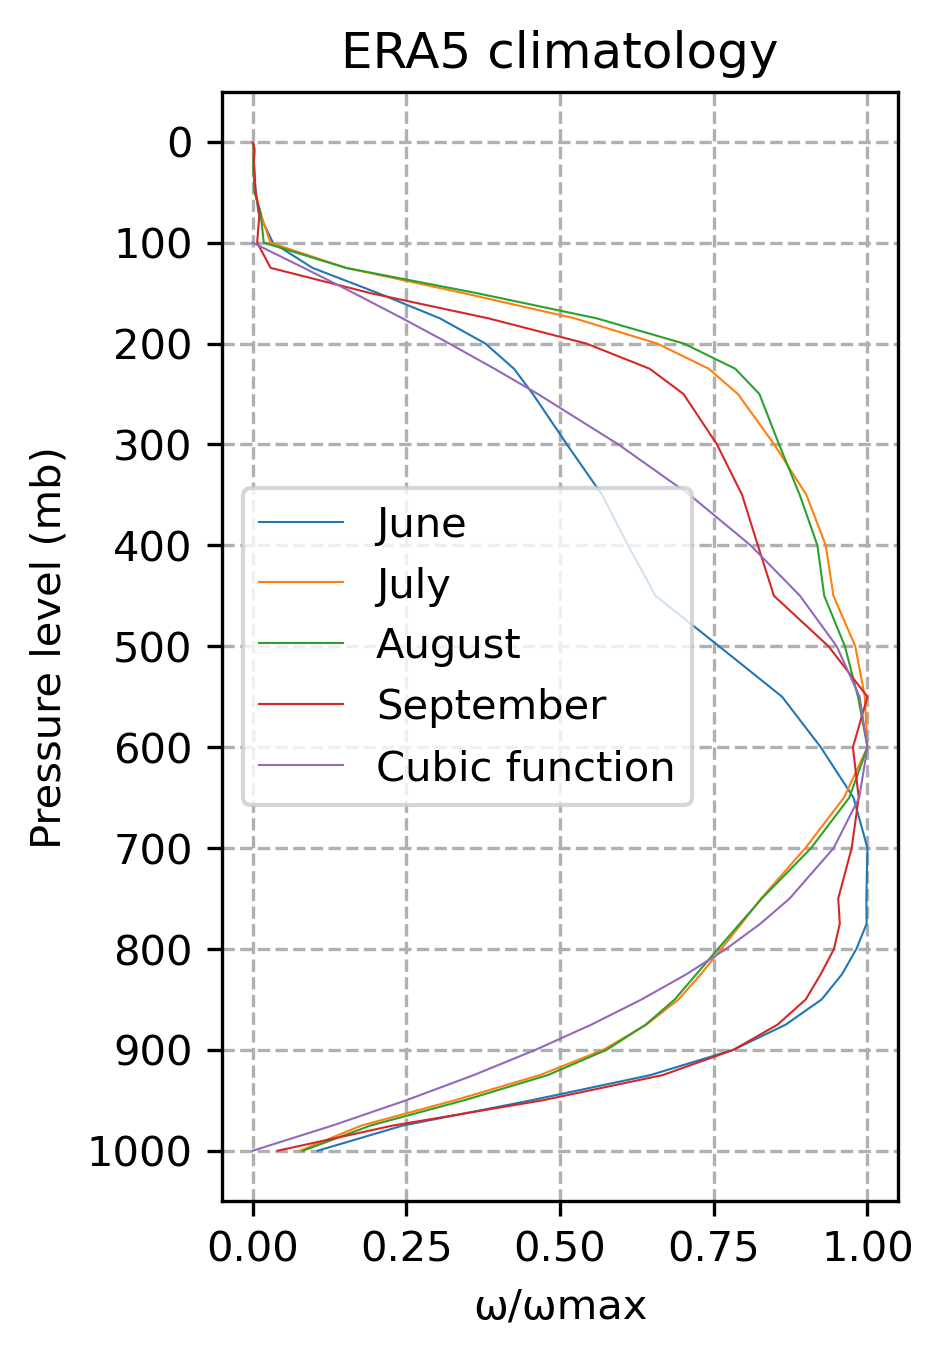

In [16]:
plt.subplot(1,2,1)
Y = np.arange(0,1001, 100)
for i in range(6,10):
    j = ds3.time.dt.month.isin(i)
    clime = ds3.sel(time=j)
    clim1 = clime.mean(dim='time')
    wmax1 = np.max(abs(clim1))
    om1 = np.divide(abs(clim1), abs(wmax1))
    om1.plot(y='level', label=m[i-6], lw=0.5)
    
plt.plot(y, om1.level[10:], label='Cubic function', lw=0.5)
plt.ylabel('Pressure level (mb)')
plt.xlabel('\u03C9/\u03C9max')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.legend()
plt.title('ERA5 climatology')
plt.gca().invert_yaxis()

In [5]:
d1 = ds3.groupby('time.year').mean('time')
d2 = d1.sel(year=slice('1961', '2020'))

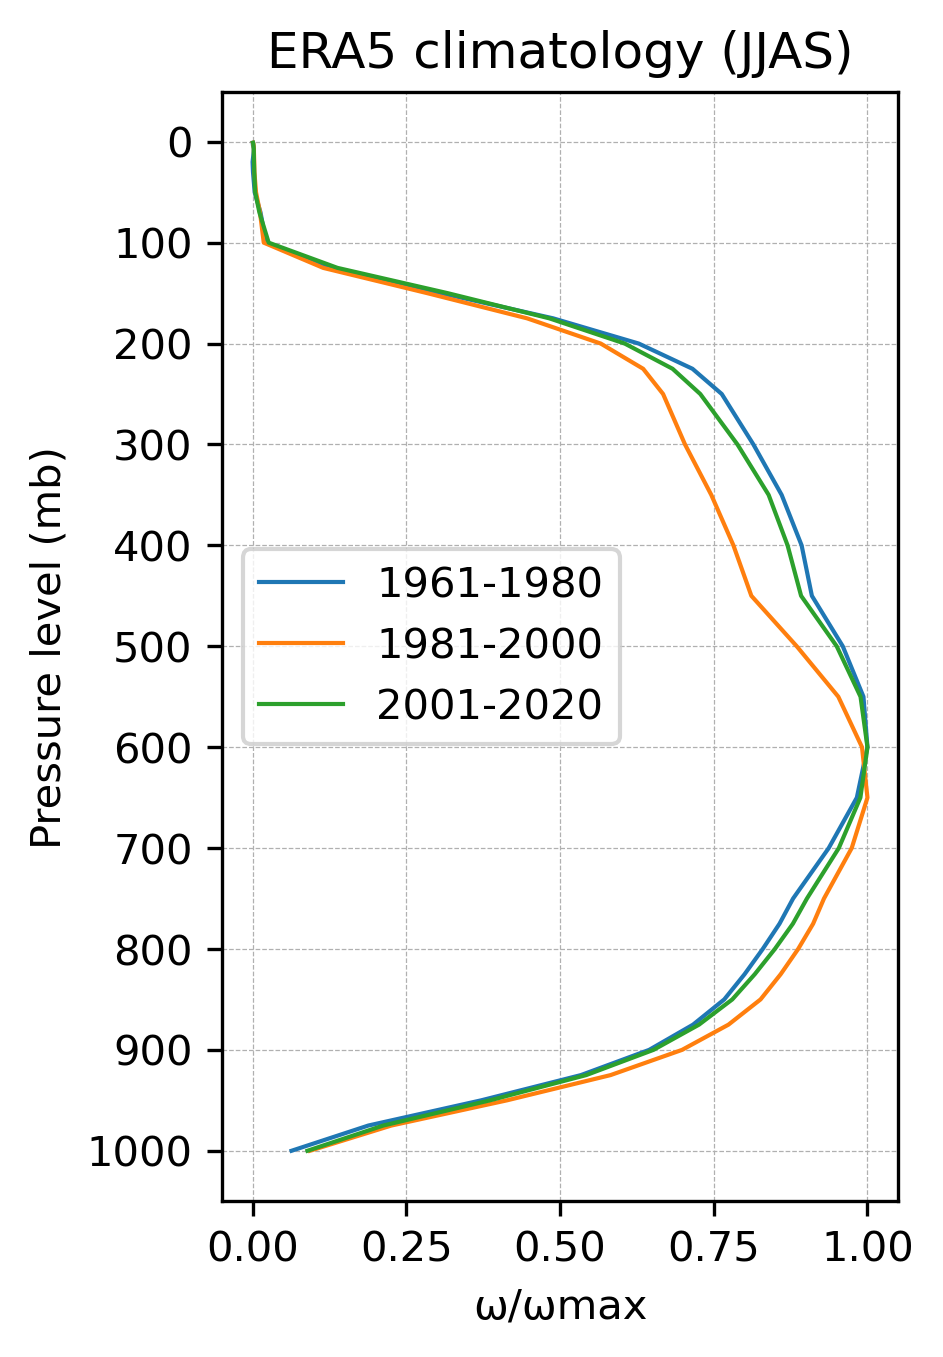

In [22]:
ini  = 1961
final = 1980
plt.subplot(1,2,1)
Y = np.arange(0,1001, 100)
for i in range(0,3):
    ds3 = d2.sel(year=slice(ini, final))
    clim1 = ds3.mean(dim='year')
    wmax1 = np.max(abs(clim1))
    om1 = np.divide(abs(clim1), abs(wmax1))
    om1.plot(y='level', label=str(ini)+'-'+str(final), lw=1)
    ini=ini+20
    final=final+20
    
plt.ylabel('Pressure level (mb)')
plt.xlabel('\u03C9/\u03C9max')
plt.grid(ls='--', lw=0.3)
plt.yticks(Y)
plt.legend()
plt.title('ERA5 climatology (JJAS)')
plt.gca().invert_yaxis()

# All July

In [5]:
m = ['June', 'July', 'August', 'September']

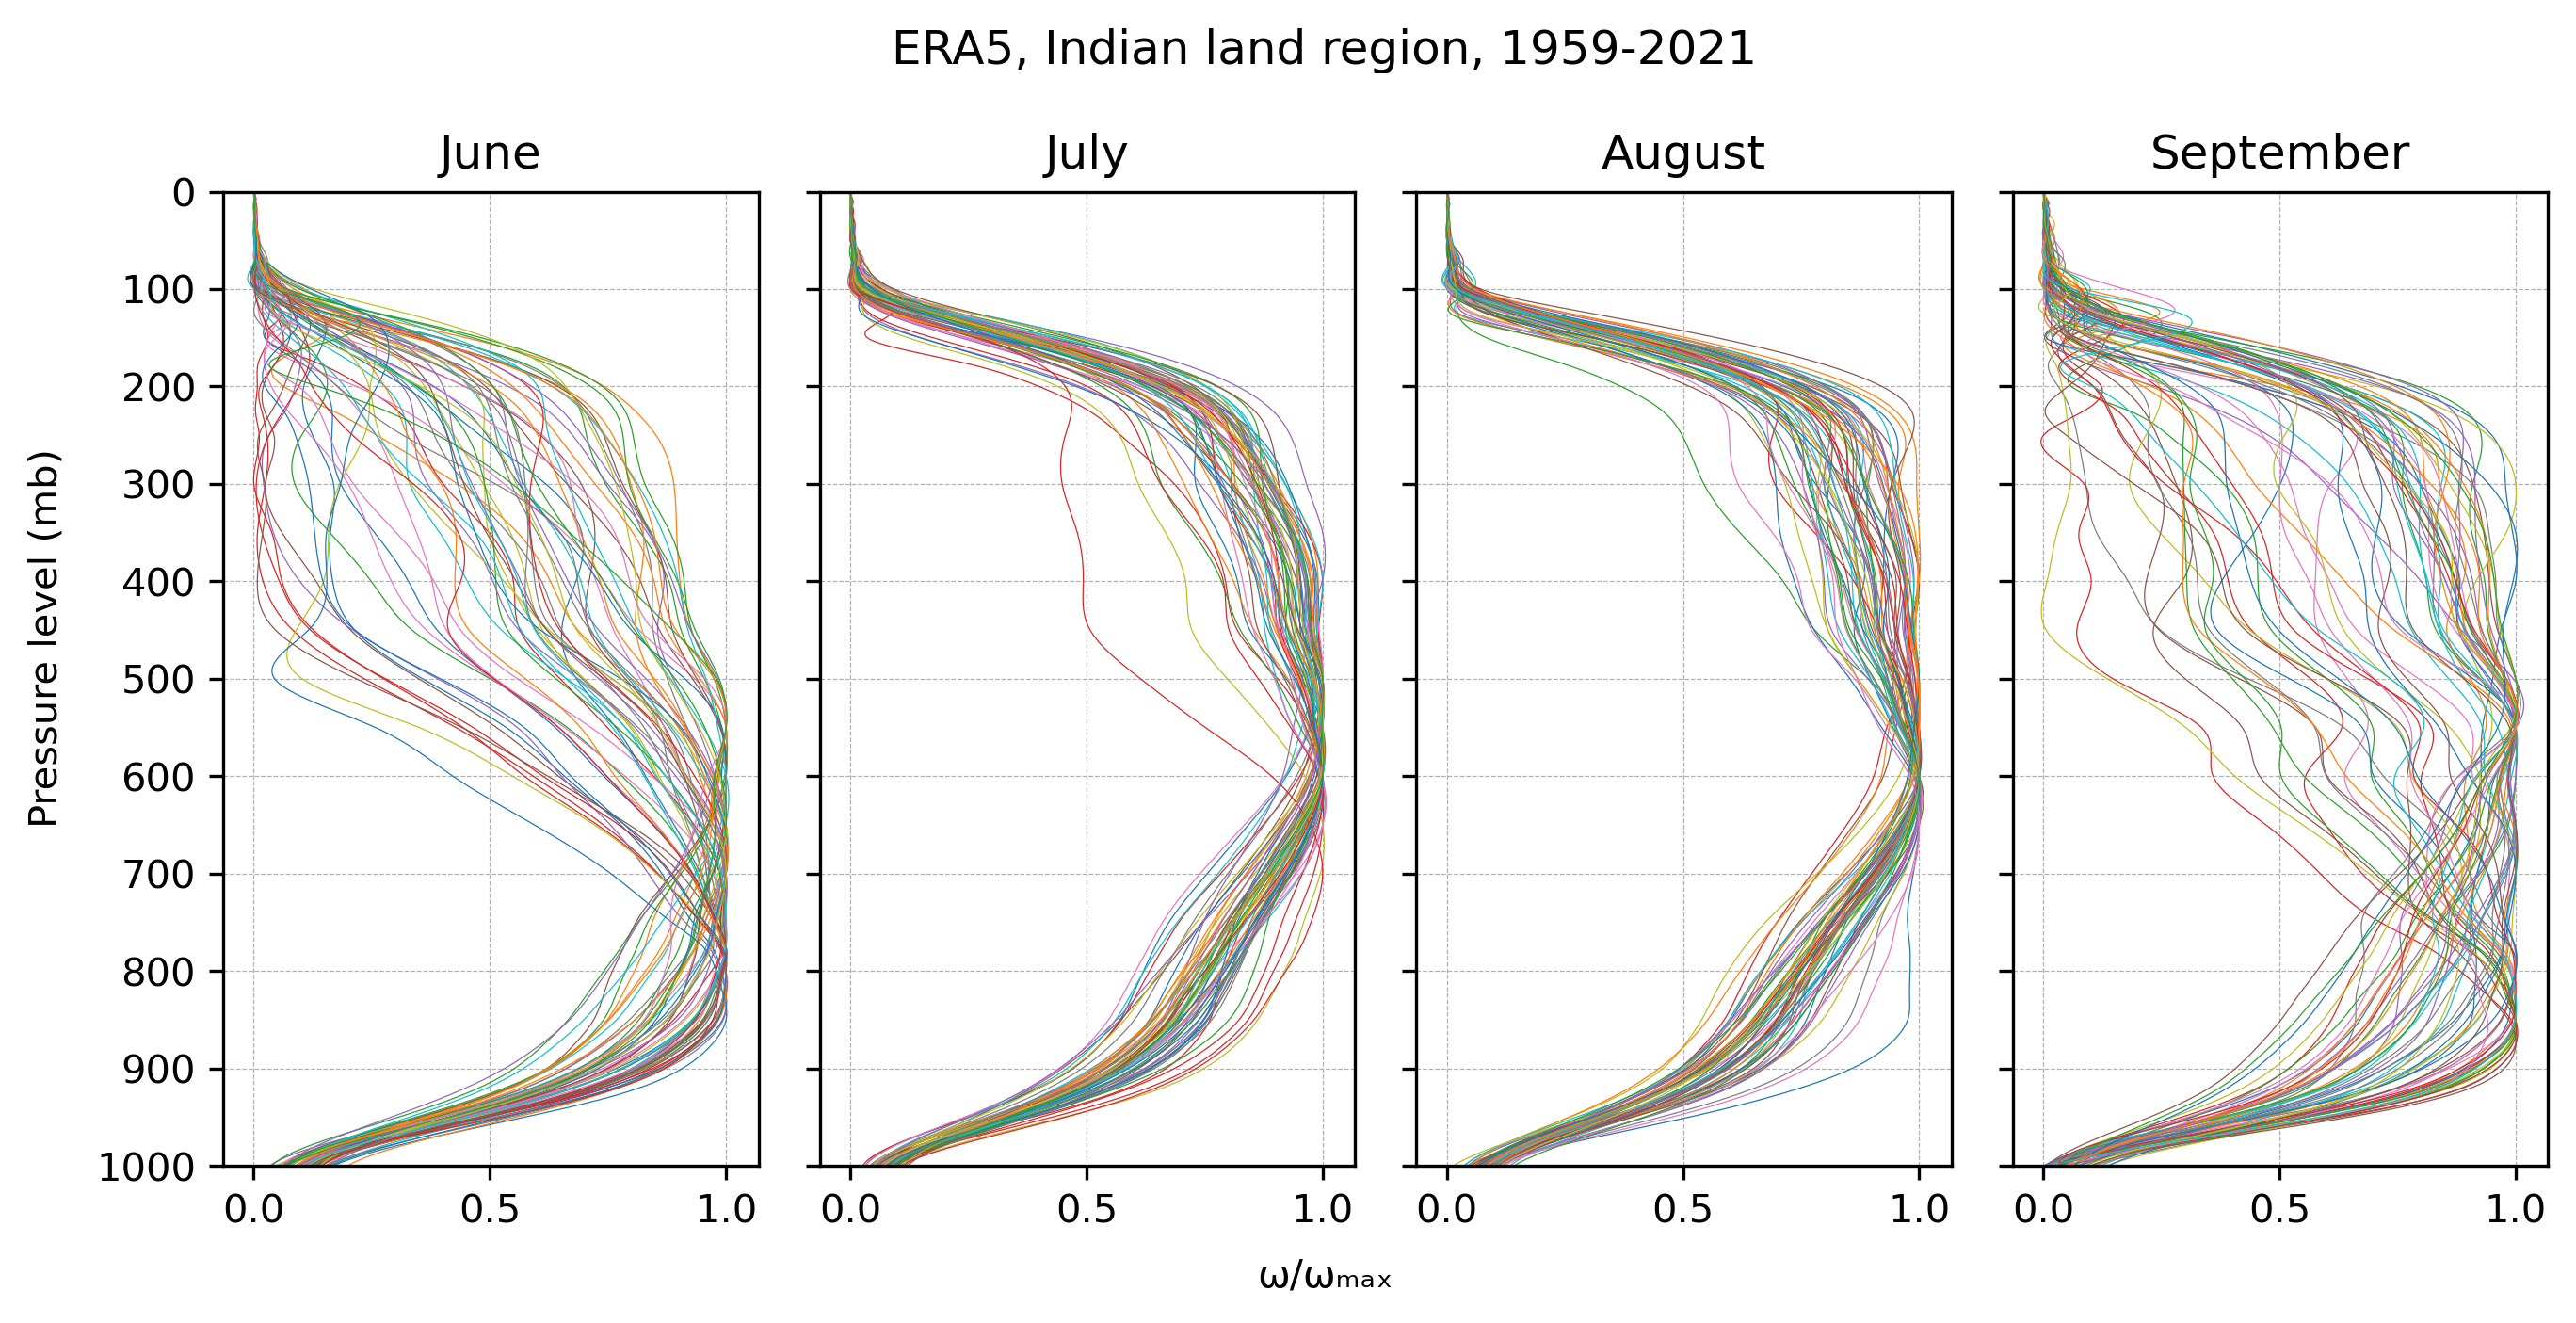

In [9]:
Y = np.arange(0,1001, 100)
xs= np.arange(1, 1001, 1)
fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(9, 4.5))
for j in range(6, 10):
    month = j
    july = ds3.time.dt.month.isin(month)
    climf = ds3.sel(time=july)
    plt.subplot(1,4,j-5)
    for i in climf.time:
        clim1 = climf.sel(time=i)
        wmax1 = np.max(abs(clim1))
        om1 = np.divide(abs(clim1), abs(wmax1))
        om1 = om1.interp(level=xs, method="cubic")
        plt.plot(om1, xs, linewidth=0.3)
        plt.grid(linestyle='--', linewidth=0.3)
        plt.title(m[j-6])
        plt.ylim(0, 1000)
    
fig.text(0.5, -0.01, '\u03C9/\u03C9' + sub, ha='center')
fig.text(-0.01, 0.5, 'Pressure level (mb)', va='center', rotation='vertical')
plt.yticks(Y)
plt.gca().invert_yaxis()
plt.suptitle('ERA5, Indian land region, 1959-2021')
plt.tight_layout()

In [26]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
d = xr.open_dataset(h)

In [27]:
lon_grid, lat_grid = np.meshgrid(d.longitude, d.latitude)
eramask = globe.is_land(lat_grid, lon_grid)

In [28]:
era = 86400*d.mtpr.where(eramask>0).mean(dim=['latitude', 'longitude']).squeeze()

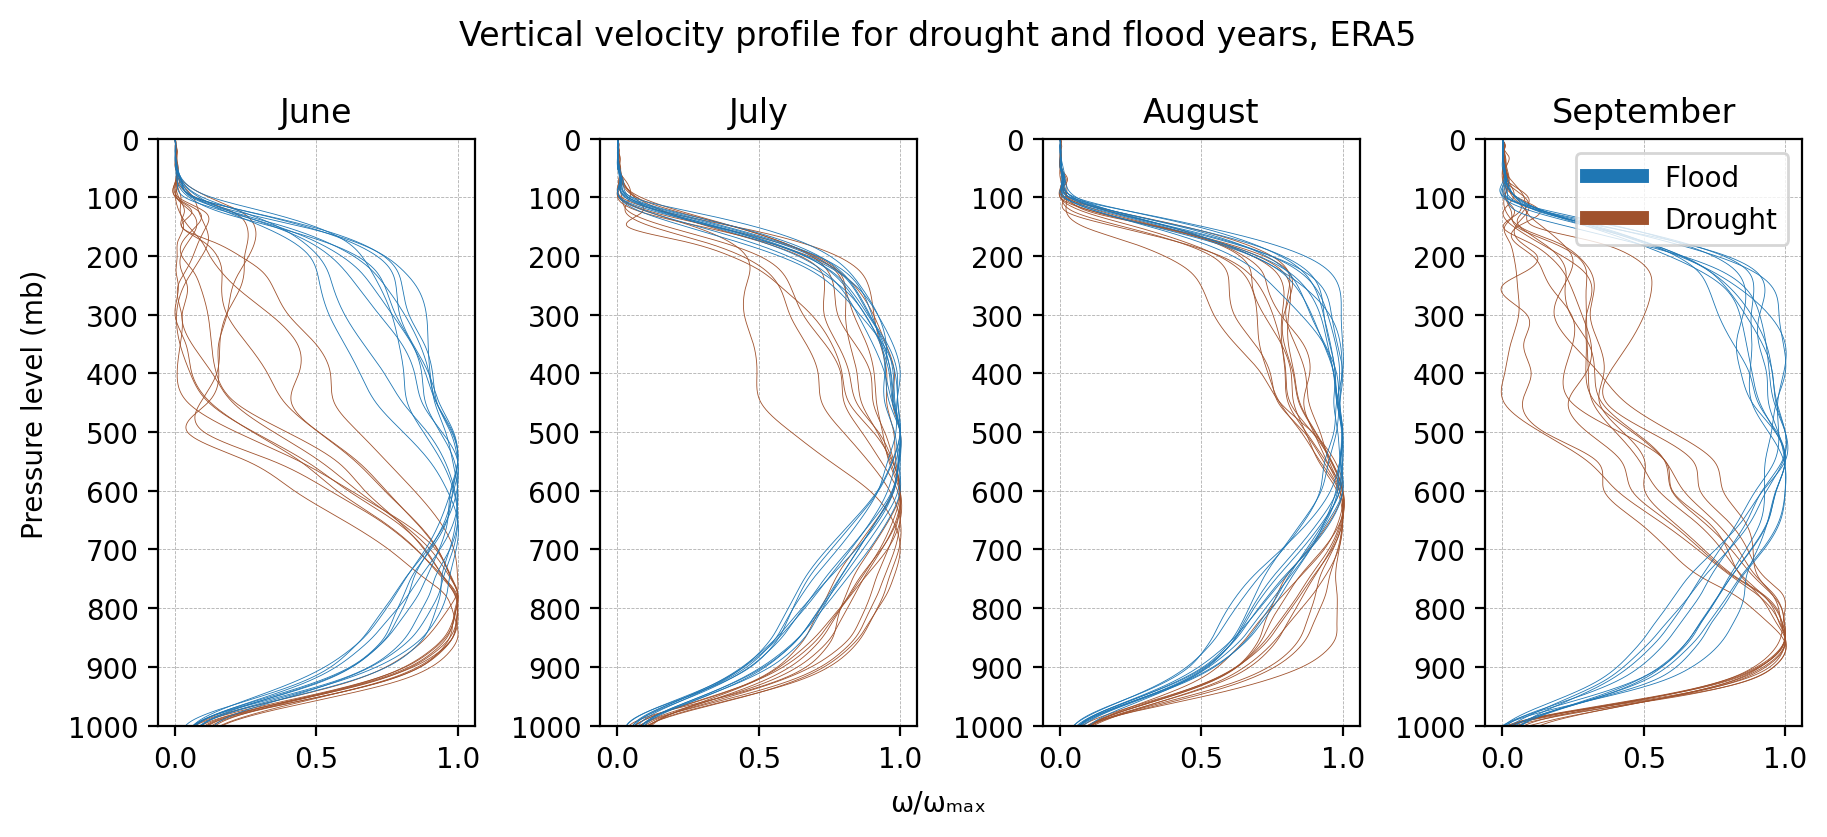

In [81]:
Y = np.arange(0,1001, 100)
xs= np.arange(1, 1001, 1)
fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, figsize=(9, 4))
for j in range(6, 10):
    month = j
    july = ds3.time.dt.month.isin(month)
    climf = ds3.sel(time=july)
    july = era.time.dt.month.isin(month)
    sel = era.sel(time=july)
    sort =  sel.sortby(sel)
    plt.subplot(1,4,j-5)
    for i in sort.time[0:10]:
        clim1 = climf.sel(time=i)
        wmax1 = np.max(abs(clim1))
        om1 = np.divide(abs(clim1), abs(wmax1))
        om1 = om1.interp(level=xs, method="cubic")
        plt.plot(om1, xs, linewidth=0.3, c='sienna')
        plt.grid(linestyle='--', linewidth=0.3)
        plt.title(m[j-6])
        plt.ylim(0, 1000)
        plt.yticks(Y)
        plt.gca().invert_yaxis()
    for i in sort.time[-10:]:
        clim1 = climf.sel(time=i)
        wmax1 = np.max(abs(clim1))
        om1 = np.divide(abs(clim1), abs(wmax1))
        om1 = om1.interp(level=xs, method="cubic")
        plt.plot(om1, xs, linewidth=0.3, c='tab:blue')
        plt.grid(linestyle='--', linewidth=0.3)
        plt.title(m[j-6])
        plt.ylim(0, 1000)
        plt.yticks(Y)
        plt.gca().invert_yaxis()
    
    
plt.plot([],[], 'tab:blue', label='Flood', linewidth=5)
plt.plot([],[], 'sienna', label='Drought', linewidth=5)
plt.legend()    
fig.text(0.5, -0.01, '\u03C9/\u03C9' + sub, ha='center')
fig.text(-0.01, 0.5, 'Pressure level (mb)', va='center', rotation='vertical')
plt.suptitle('Vertical velocity profile for drought and flood years, ERA5')
plt.tight_layout()

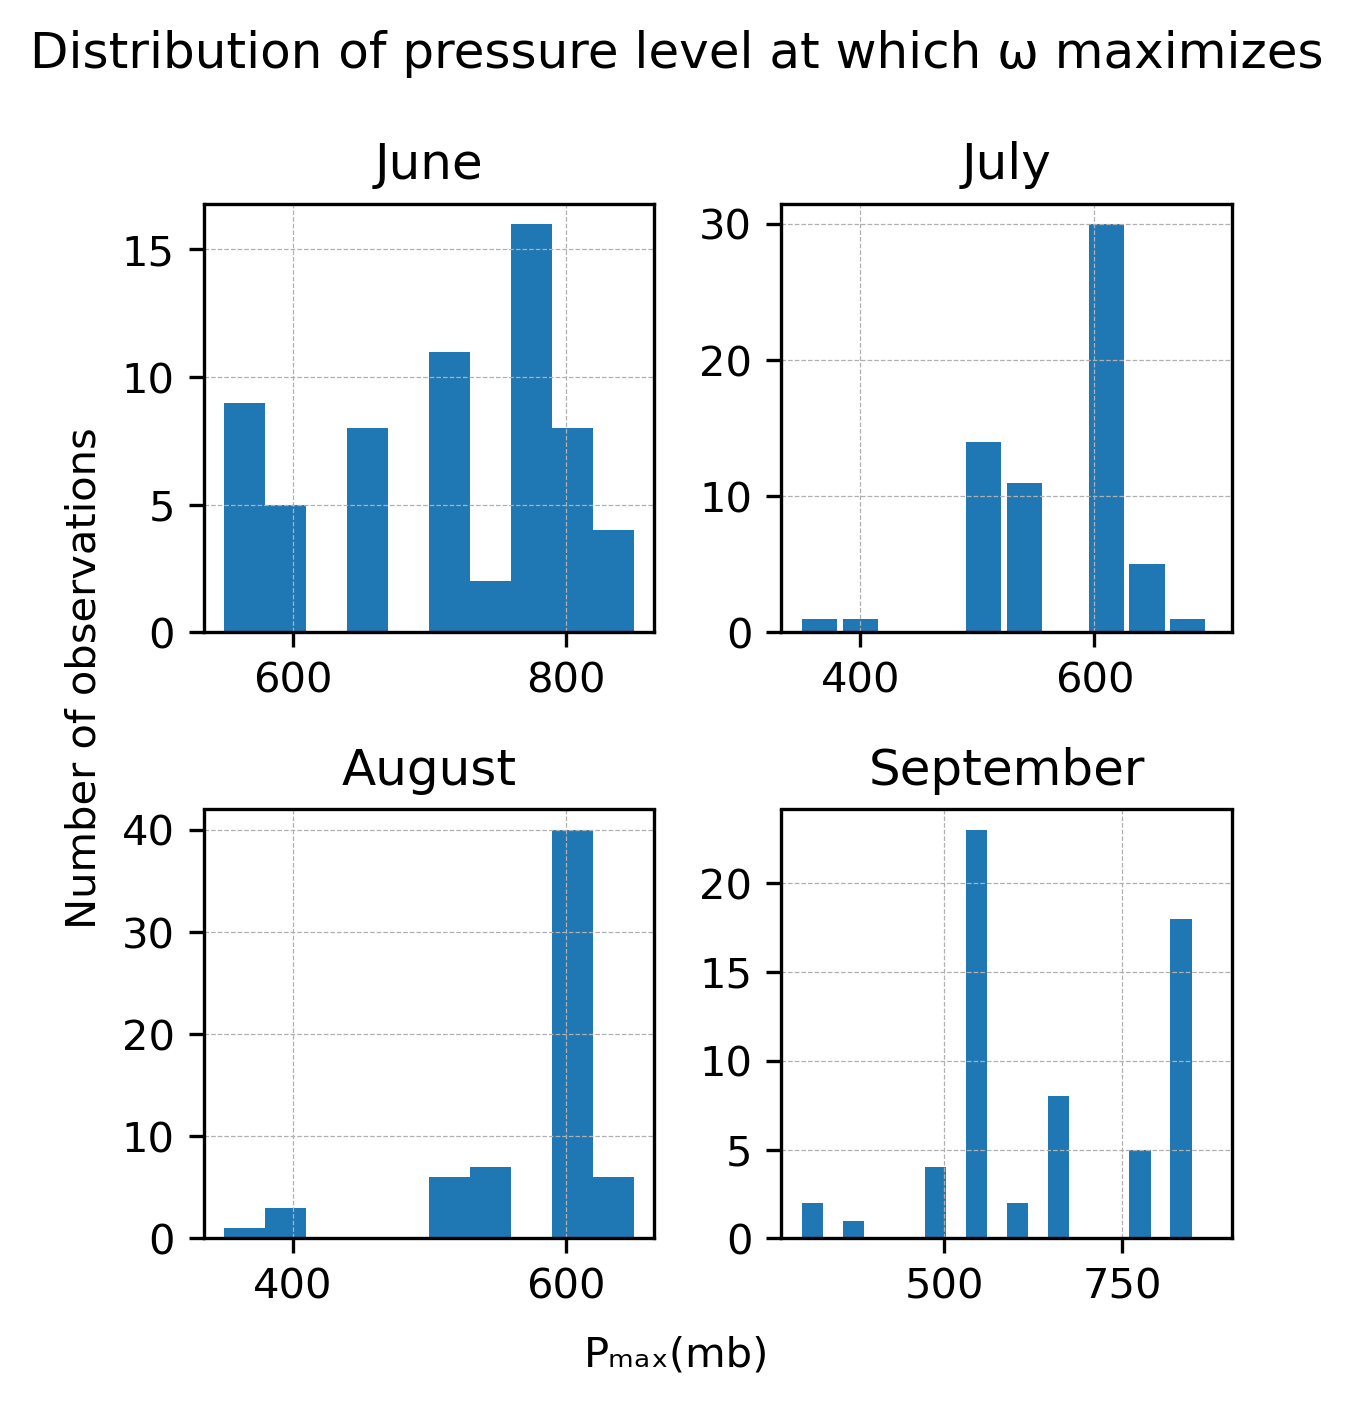

In [90]:
X = np.ones(63)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(4, 4.5))
for j in range(6, 10):
    month = j
    july = ds3.time.dt.month.isin(month)
    climf = ds3.sel(time=july)
    pmax = []
    plt.subplot(2,2,j-5)
    for i in climf.time:
        clim1 = climf.sel(time=i)
        wmax1 = np.max(abs(clim1))
        om1 = np.divide(abs(clim1), abs(wmax1))
        ma = np.where(om1==1)
        pmax.append(om1.level[ma].values[0])
    
    plt.hist(pmax, width=30)
    plt.grid(linestyle='--', linewidth=0.3)
    plt.title(m[j-6])
    
fig.text(0.5, -0.01, 'P' + sub + '(mb)', ha='center')
fig.text(-0.01, 0.5, 'Number of observations', va='center', rotation='vertical')
plt.suptitle('Distribution of pressure level at which \u03C9 maximizes')
plt.tight_layout()

In [122]:
om1.level[ma[0][0]].values

array(550, dtype=int32)

In [126]:
month = range(6, 10)
jjas = ds3.time.dt.month.isin(month)
climf = ds3.sel(time=jjas)
climf = climf.groupby('time.year').mean('time')

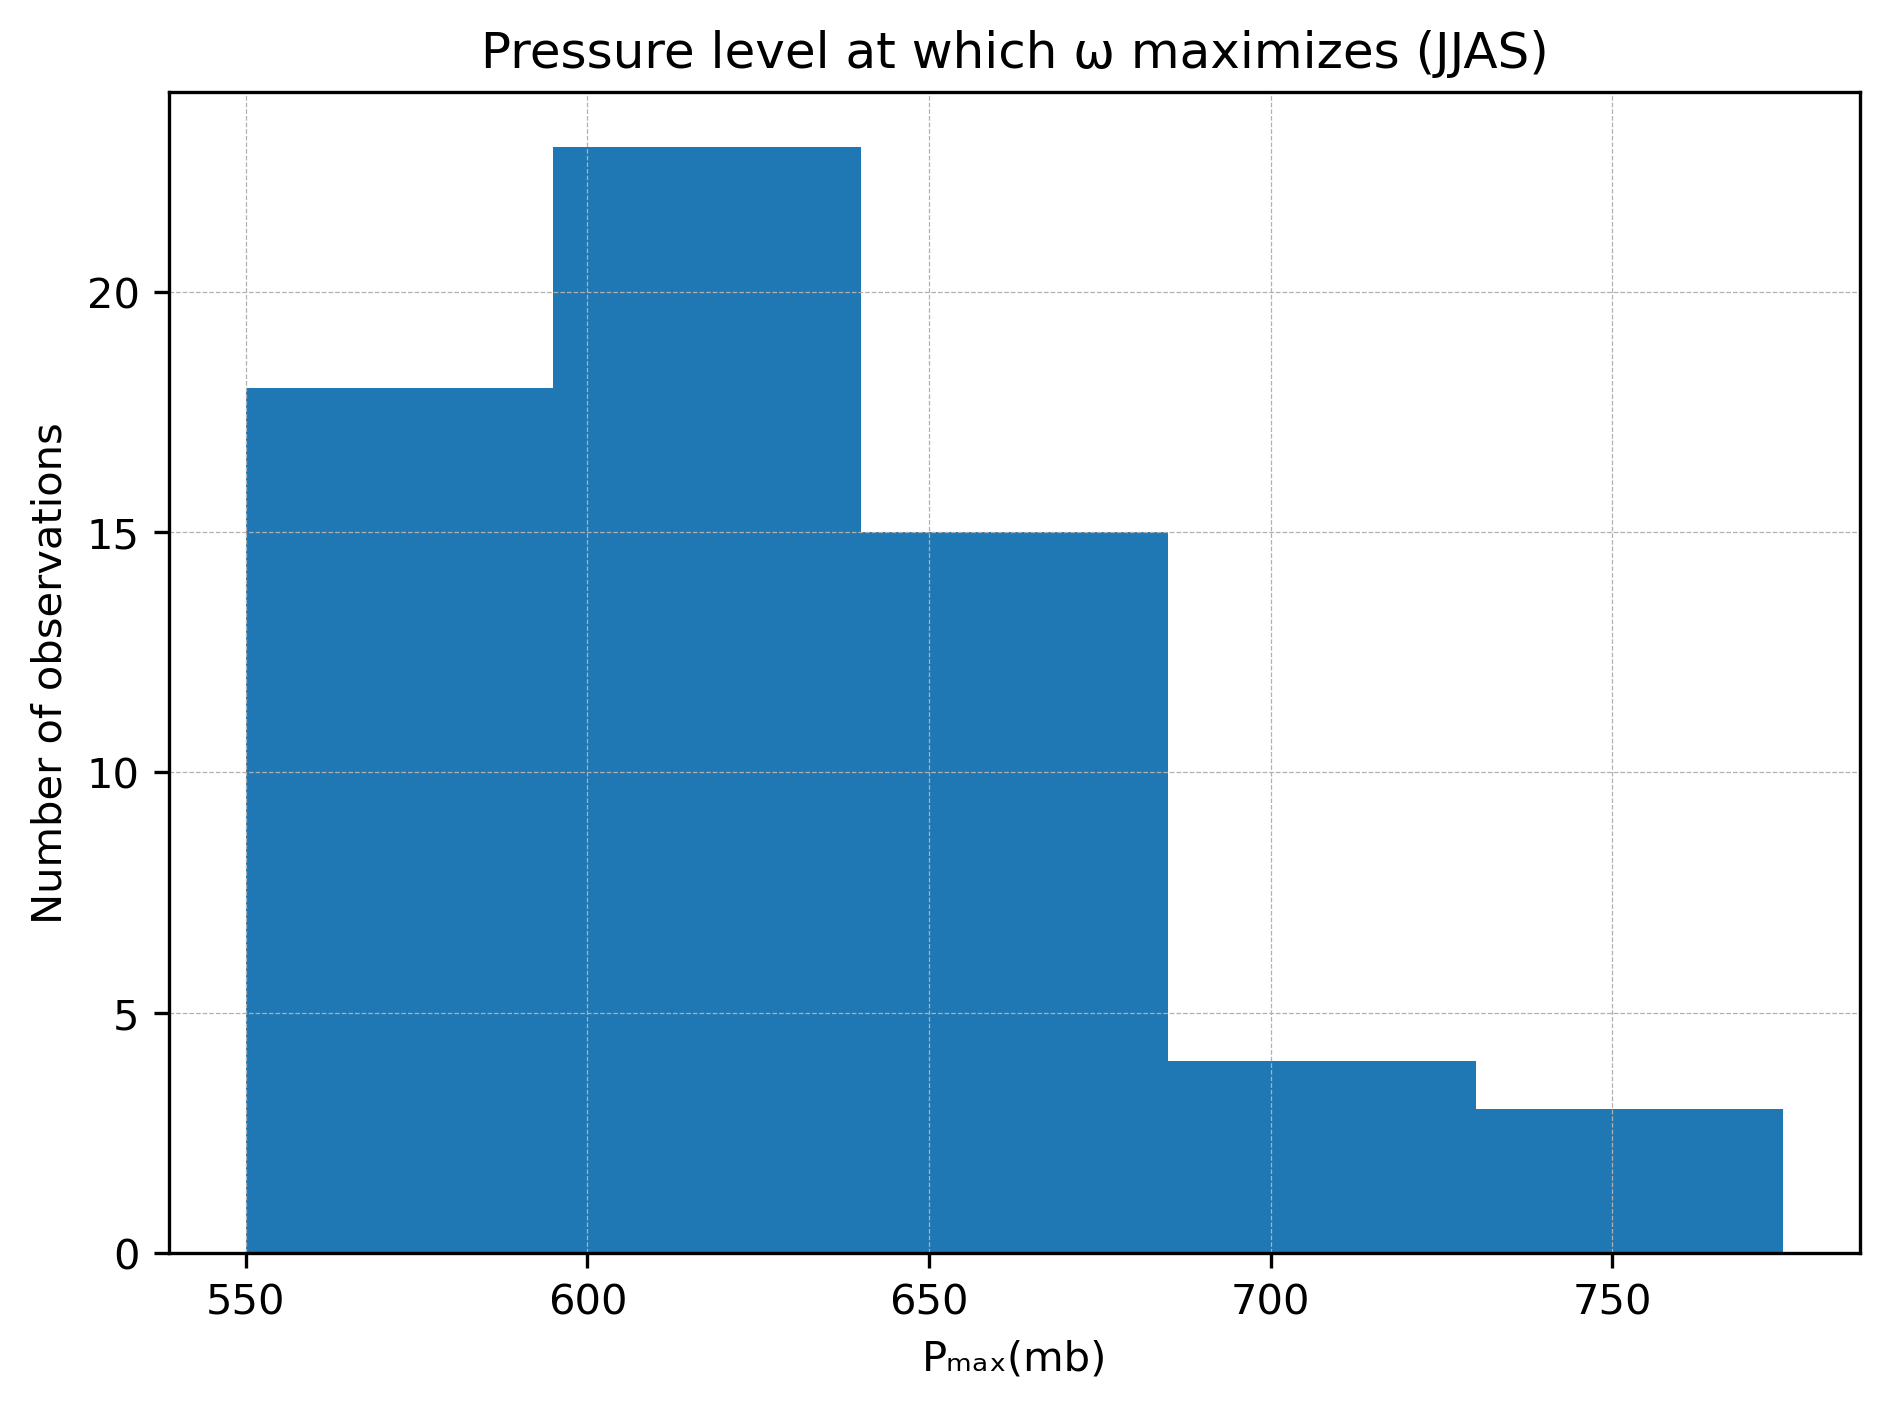

In [135]:
pmax = []
for i in climf.year:
        clim1 = climf.sel(year=i)
        wmax1 = np.max(abs(clim1))
        om1 = np.divide(abs(clim1), abs(wmax1))
        ma = np.where(om1==1)
        pmax.append(om1.level[ma[0][0]].values)

plt.hist(pmax, bins=5)
plt.grid(linestyle='--', linewidth=0.3)

plt.xlabel('P' + sub + '(mb)')
plt.ylabel('Number of observations')
plt.title('Pressure level at which \u03C9 maximizes (JJAS)')
plt.tight_layout()

# Climatology and particular year comparison

In [74]:
month = 9
july = ds3.time.dt.month.isin(month)
clime = ds3.sel(time=july)

In [75]:
year1='2019'

clim1 = clime.mean(dim='time')
clim2 = clime.sel(time=year1).mean(dim='time')

wmax1 = np.max(abs(clim1))
wmax2 = np.max(abs(clim2))

om1 = np.divide(abs(clim1), abs(wmax1))
om2 = np.divide(abs(clim2), abs(wmax2))
Y = np.arange(0,1001, 100)

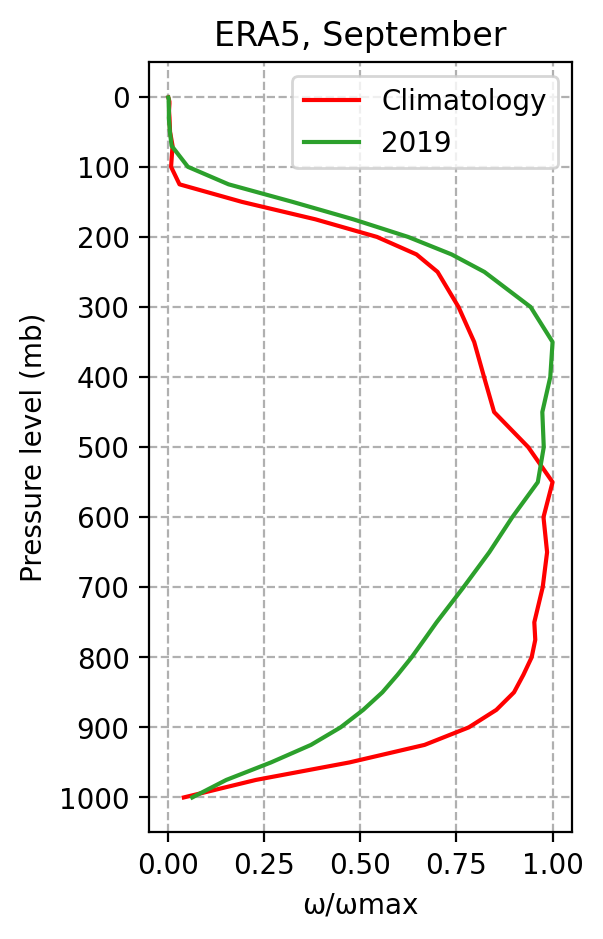

In [78]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.subplot(1,2,1)
om1.plot(y='level', c='r', label='Climatology')
om2.plot(y='level', c='tab:green', label='2019')
plt.ylabel('Pressure level (mb)')
plt.xlabel('\u03C9/\u03C9max')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.legend()
plt.title('ERA5, September')
plt.gca().invert_yaxis()

# Umax and Vmax

In [7]:
ds4 = ds2.where(mask2>0).mean(dim=['latitude', 'longitude']).squeeze()

In [8]:
month = 9
july = ds4.time.dt.month.isin(month)
clime = ds4.sel(time=july)

In [9]:
year1='2000'

clim = clime.sel(time=year1).mean(dim='time')
clim1 = clim.u
clim2 = clim.v
clim3 = clim.w

wmax1 = np.max(abs(clim1))
wmax2 = np.max(abs(clim2))
wmax3 = np.max(abs(clim3))

om1 = np.divide(abs(clim1), abs(wmax1))
om2 = np.divide(abs(clim2), abs(wmax2))
om3 = np.divide(abs(clim3), abs(wmax3))
Y = np.arange(0,1001, 100)

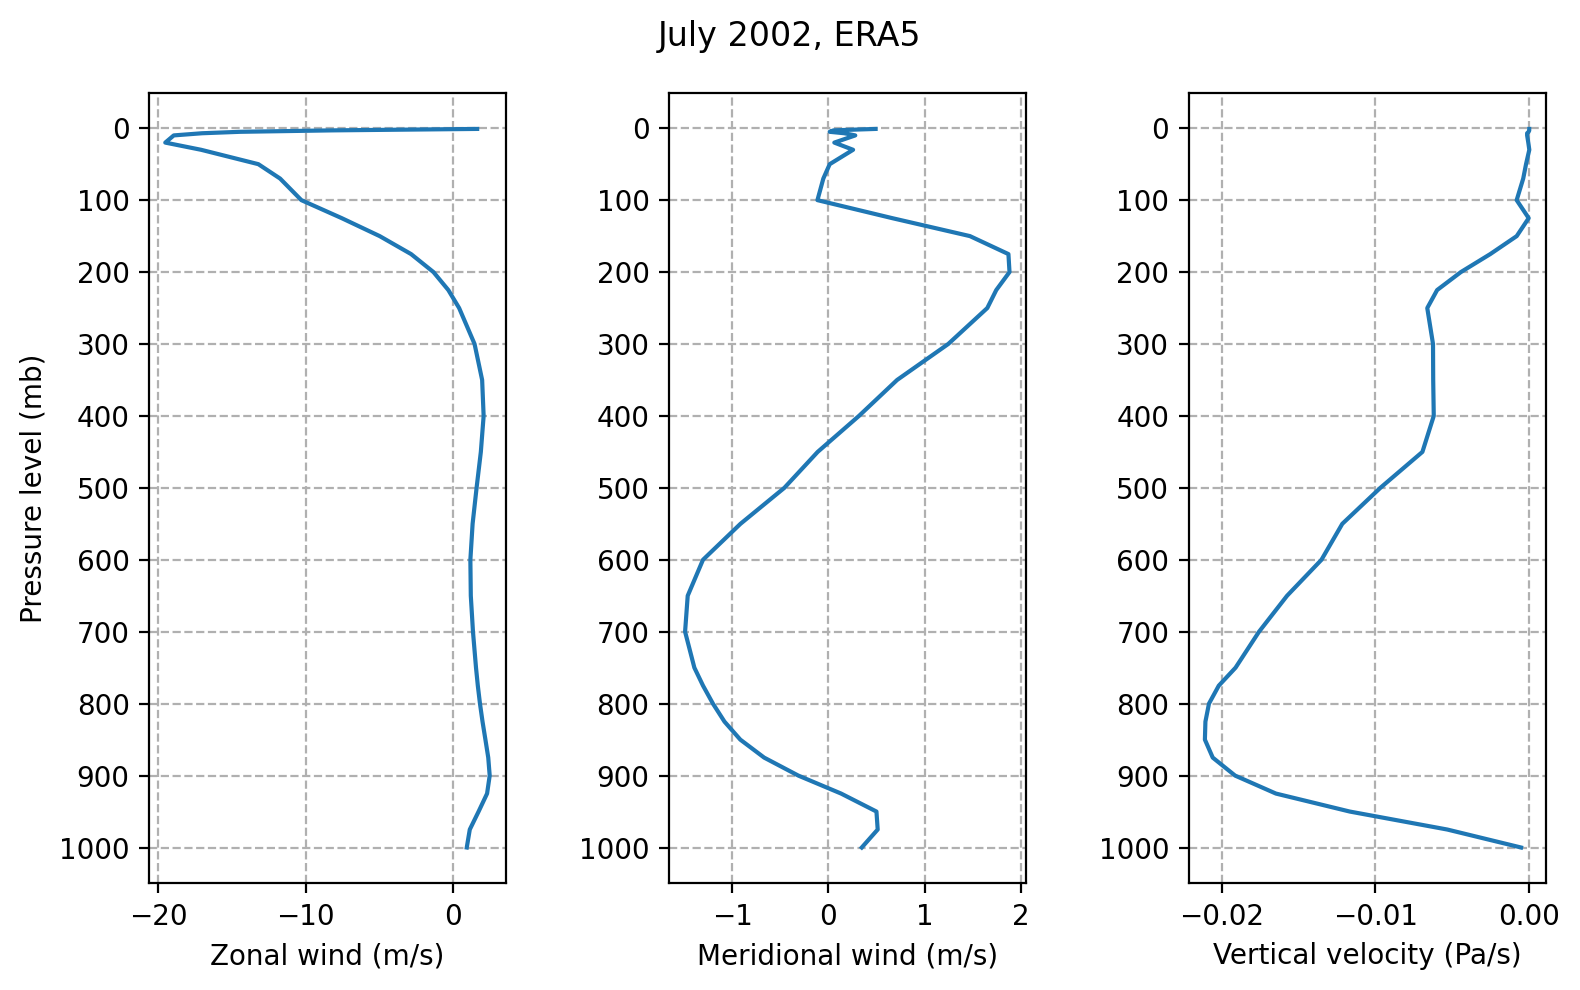

In [190]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.subplot(1,3,1)
clim1.plot(y='level')
plt.xlabel('Zonal wind (m/s)')
plt.ylabel('Pressure level (mb)')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
clim2.plot(y='level')
plt.xlabel('Meridional wind (m/s)')
plt.ylabel(' ')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
clim3.plot(y='level')
plt.xlabel('Vertical velocity (Pa/s)')
plt.ylabel(' ')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.gca().invert_yaxis()

plt.suptitle('July 2002, ERA5')

plt.tight_layout()

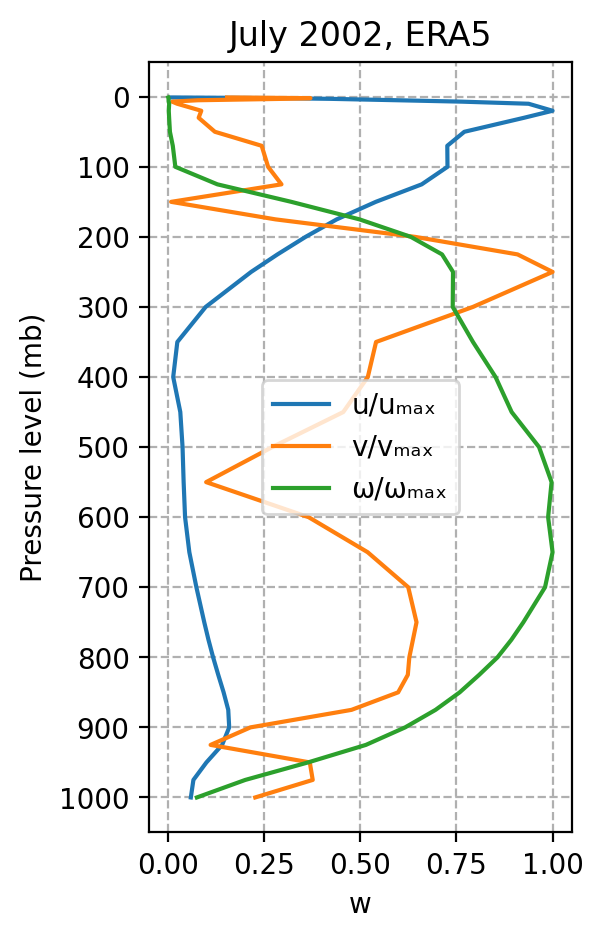

In [185]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.subplot(1,2,1)
om1.plot(y='level', label='u/u'+sub)
om2.plot(y='level', label='v/v'+sub)
om3.plot(y='level', label='\u03C9/\u03C9'+sub)
plt.ylabel('Pressure level (mb)')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.legend()
plt.title('July 2002, ERA5')
plt.gca().invert_yaxis()

# MSE Profile

In [10]:
g = 9.80616 #Avg. gravity acceleration on Earth
Cp = 1004.64 #Specific heat at constant pressure for dry air
Lv = 2.501e6 #Latent heat of vaporization for liquid water at 0C

In [37]:
clim=clim.sel(level=slice(100, 1000))

In [38]:
MSE = (Cp*clim.t + Lv*clim.q + clim.z)/1000

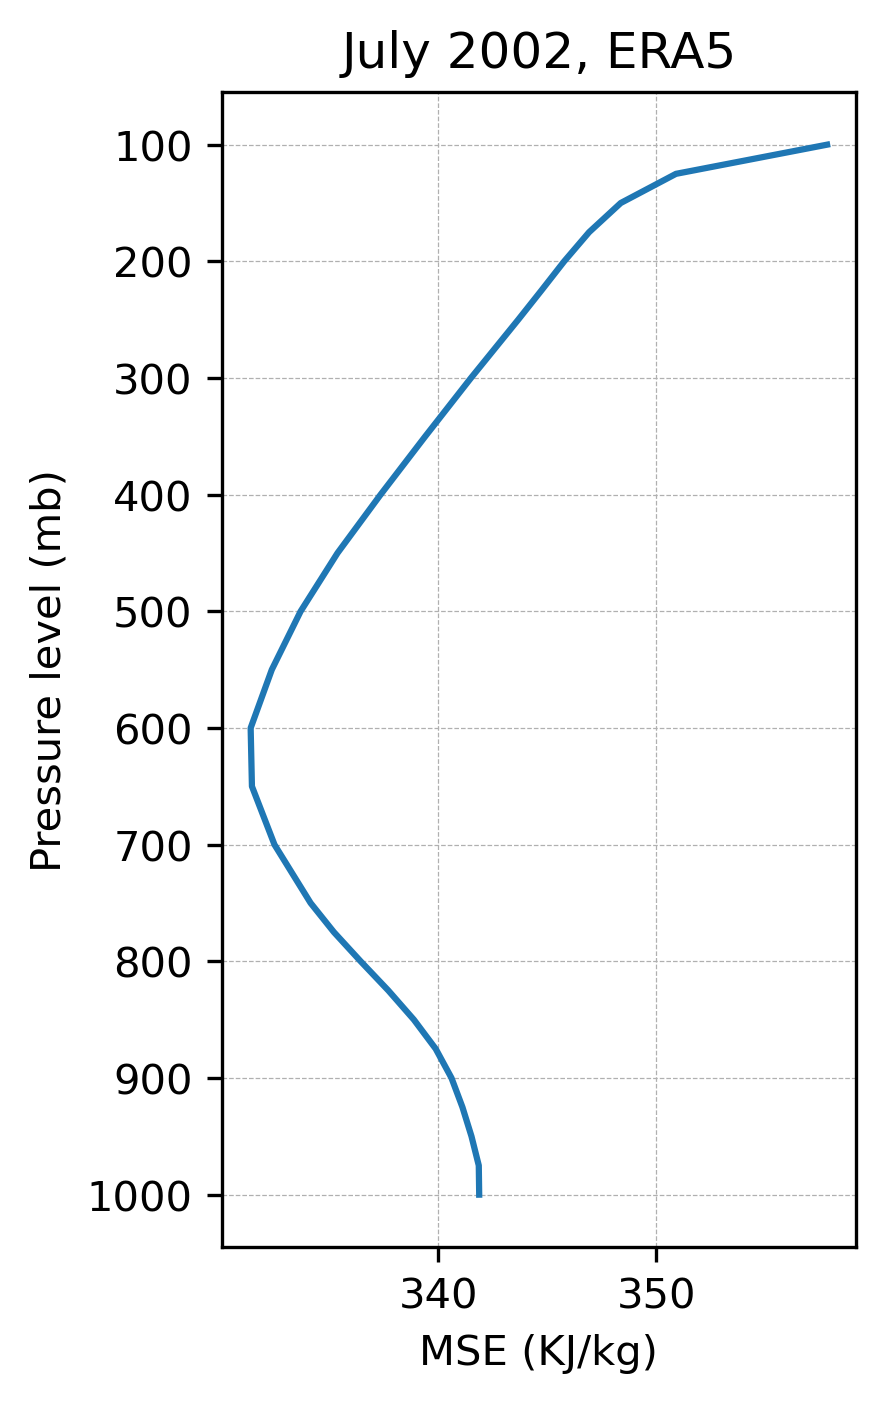

In [41]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.subplot(1,2,1)
MSE.plot(y='level')
plt.xlabel('MSE (KJ/kg)')
plt.yticks(np.arange(100, 1001, 100))
plt.title('July 2002, ERA5')
plt.gca().invert_yaxis()
plt.ylabel('Pressure level (mb)')
plt.grid(ls='--', lw=0.3)

In [ ]:
jjas = d.time.dt.month.isin(range(6, 10)) #JJAS
#months = d.time.dt.month.isin(range(7, 9))
clim = d.sel(time=jjas) 
clim2 = clim.groupby('time.year').mean('time')
clim3 = 86400*clim2.where(eramask>0).mean(dim=['latitude', 'longitude'])

In [7]:
month = range(6,10)
july = ds3.time.dt.month.isin(month)
clim = ds3.sel(time=july)
clim = clim.resample(time="1Y").mean()
inclim = clim.sel(time='1987').mean(dim='time')
tempclim = clim.sel(time='1982').mean(dim='time')
max1clim = clim.sel(time='1964').mean(dim='time')
max2clim = clim.sel(time='2007').mean(dim='time')
meanclim = clim.mean(dim='time')

In [8]:
wmax1 = np.max(abs(meanclim))
wmax2 = np.max(abs(inclim))
wmax3 = np.max(abs(tempclim))
wmax4 = np.max(abs(max1clim))
wmax5 = np.max(abs(max2clim))

om1 = np.divide(abs(meanclim), abs(wmax1))
om2 = np.divide(abs(inclim), abs(wmax2))
om3 = np.divide(abs(tempclim), abs(wmax3))
om4 = np.divide(abs(max1clim), abs(wmax4))
om5 = np.divide(abs(max2clim), abs(wmax5))
Y = np.arange(0,1001, 100)

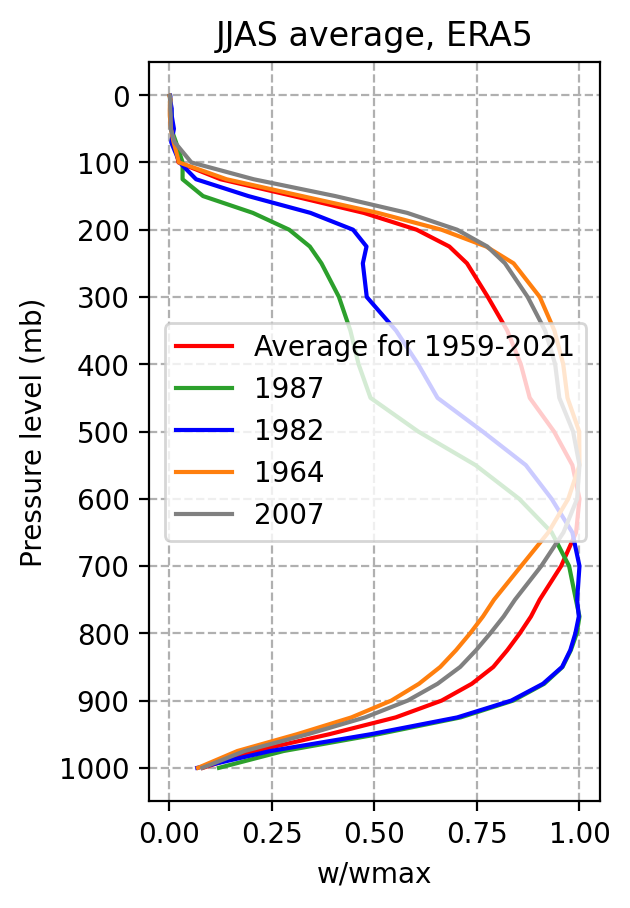

In [9]:
plt.subplot(1,2,1)
om1.plot(y='level', c='r', label='Average for 1959-2021')

om2.plot(y='level', c='tab:green', label='1987')
om3.plot(y='level', c='b', label='1982')

om4.plot(y='level', c='tab:orange', label='1964')
om5.plot(y='level', c='grey', label='2007')

plt.ylabel('Pressure level (mb)')
plt.xlabel('w/wmax')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.legend()
plt.title('JJAS average, ERA5')
plt.gca().invert_yaxis()

# Drought years to check vertical profile change

In [2]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
d = xr.open_dataset(h)

In [3]:
lon_grid, lat_grid = np.meshgrid(d.longitude, d.latitude)
eramask = globe.is_land(lat_grid, lon_grid)

In [4]:
jjas = d.time.dt.month.isin(range(6, 10)) #JJAS
#months = d.time.dt.month.isin(range(7, 9))
clim = d.sel(time=jjas) 
clim2 = clim.groupby('time.year').mean('time')
clim3 = 86400*clim2.where(eramask>0).mean(dim=['latitude', 'longitude'])

In [5]:
mean = clim3.mtpr.mean()
drought = mean-0.1*mean

In [6]:
newmean = np.array([float(mean)]*63)
x=clim3.mtpr.year
y=clim3.mtpr.values

x2 = np.linspace(x[0], x[-1] + 1, len(x) * 100)
a2 = np.interp(x2, x, newmean)
b2 = np.interp(x2, x, y)
x, a, b = x2, a2, b2    

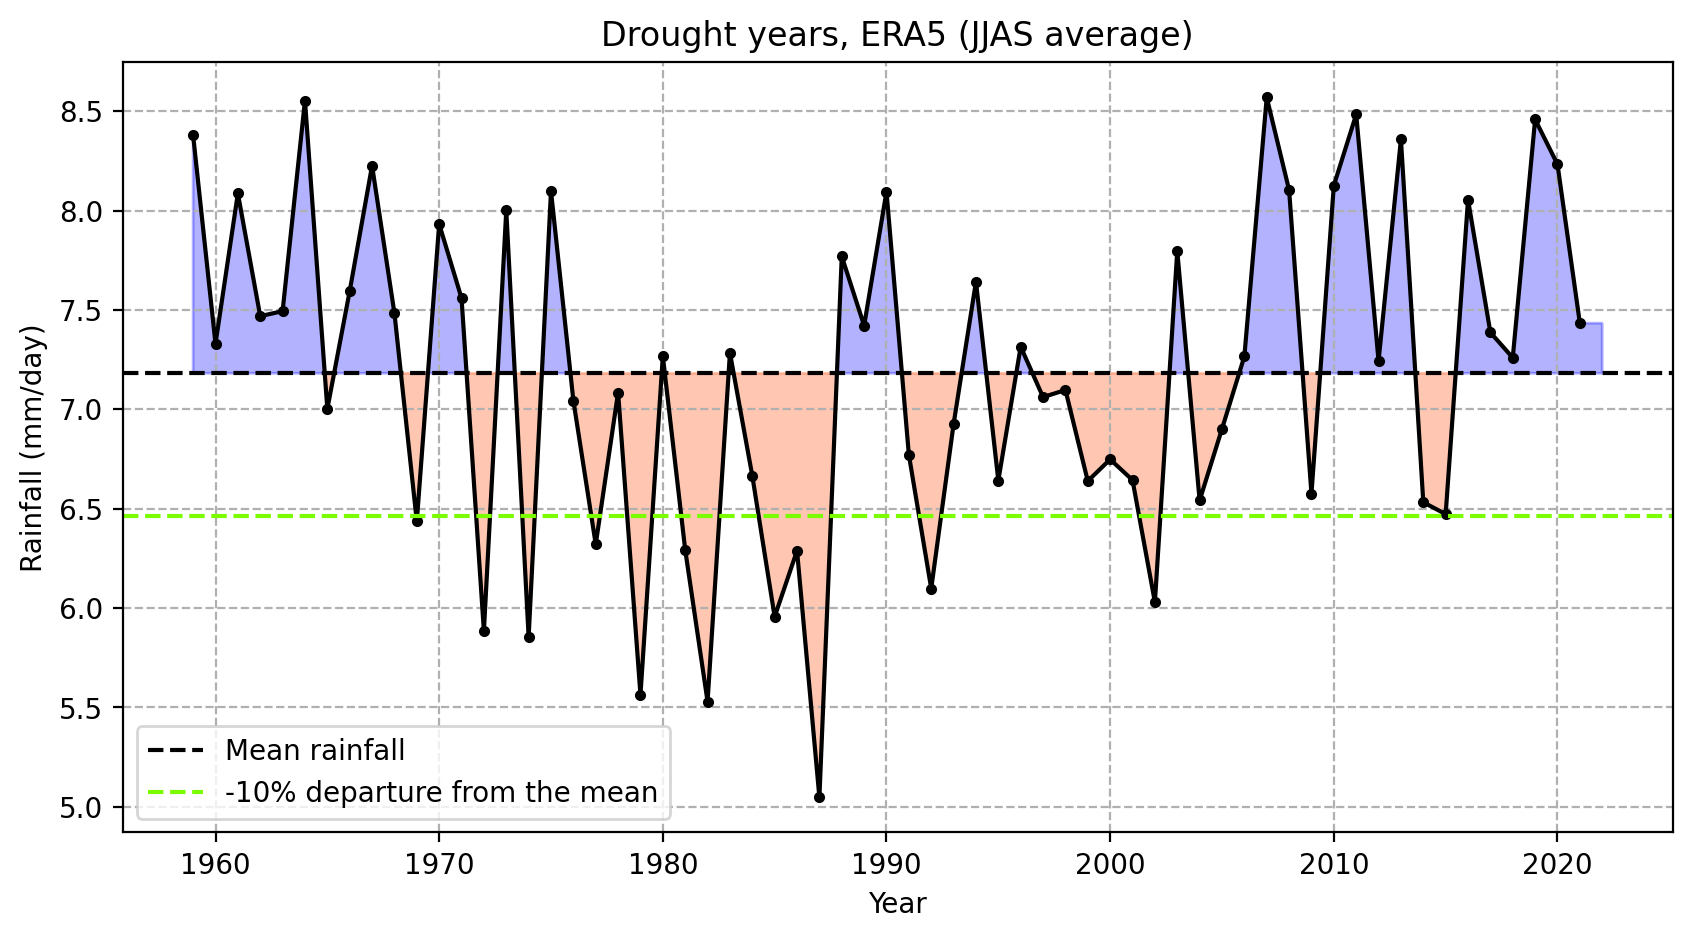

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]
clim3.mtpr.plot(c='black', marker='.' )
plt.axhline(y = mean, color = 'black', linestyle = '--', label='Mean rainfall')
plt.axhline(y = drought, color = 'lawngreen', linestyle = '--', label='-10% departure from the mean')
plt.ylabel('Rainfall (mm/day)')
plt.xlabel('Year')
plt.title('Drought years, ERA5 (JJAS average)')
plt.fill_between(x, a, np.maximum(0, b), where=a>b, alpha=0.3, color='orangered')
plt.fill_between(x, a, np.maximum(0, b), where=a<b, alpha=0.3, color='blue')
plt.grid(linestyle = '--')
plt.legend()

array([[ 1.        , -0.80239894],
       [-0.80239894,  1.        ]])

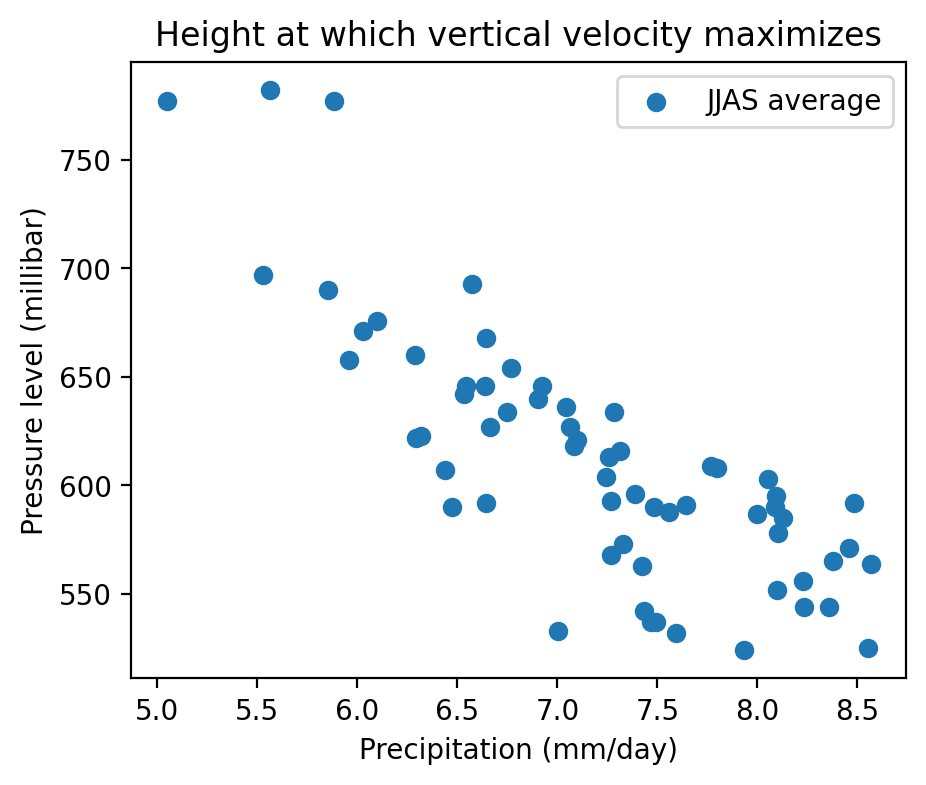

In [27]:
plt.rcParams['figure.figsize'] = [5,4]
plt.scatter(clim3.mtpr, maxw, label='JJAS average')
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Pressure level (millibar)')
plt.title('Height at which vertical velocity maximizes')
plt.legend()
np.corrcoef(clim3.mtpr, maxw)